In [1]:
import pandas as pd

import numpy as np
import statistics
import seaborn as sns

import matplotlib.pyplot as plt

from tabulate import tabulate
from scipy import stats


df1 = pd.read_csv('TxParamsDAB.csv', encoding='ISO-8859-1')
df2 = pd.read_csv('TxAntennaDAB.csv', encoding='ISO-8859-1')

## 1.2. DF1

In [2]:
# DF1 inspect headings
df1.head()

,id,Date,Ensemble,Licence,Ensemble Area,EID,Transmitter Area,Site,Freq.,Block,...,Data Serv Label11,Data SId 11 (Hex),Data Serv Label12,Data SId 12 (Hex),Data Serv Label13,Data SId 13 (Hex),Data Serv Label14,Data SId 14 (Hex),Data Serv Label15,Data SId 15 (Hex)
0,745392,23/11/2001,Aberdeen,DL000024,Aberdeen,C19A,Aberdeen,Durris,220.352,11C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,745393,22/11/2001,Aberdeen,DL000024,Aberdeen,C19A,Aberdeen,Meldrum,220.352,11C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,745394,21/11/2001,Aberdeen,DL000024,Aberdeen,C19A,Aberdeen,Mormond Hill DAB,220.352,11C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,745395,24/05/2016,Aberdeen,DL000024,Aberdeen,C19A,Redmoss,Redmoss,220.352,11C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,745396,04/04/2002,Ayr,DL000027,Ayr,C19B,Ayr,Brown Carrick Hill,218.640,11B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# DF1 column names and data types
column_summary = []

for col in df1.columns:
    dtype = df1[col].dtype
    non_null_count = df1[col].count()
    column_summary.append((col, dtype, non_null_count))

# Summary list converted to a DataFrame for printing
summary_df1 = pd.DataFrame(column_summary, columns=['Column Name', 'Data Type', 'Non-Null Count'])
summary_df1
# summary_df1[61:121]

,Column Name,Data Type,Non-Null Count
0,id,int64,1214
1,Date,object,1199
2,Ensemble,object,1214
3,Licence,object,1213
4,Ensemble Area,object,1214
...,...,...,...
133,Data SId 13 (Hex),float64,0
134,Data Serv Label14,float64,0
135,Data SId 14 (Hex),float64,0
136,Data Serv Label15,float64,0


In [4]:
# Check if a column has unique values
duplicates = df1[df1['id'].duplicated(keep=False)]
print(duplicates)

Empty DataFrame
Columns: [id, Date, Ensemble, Licence, Ensemble Area, EID, Transmitter Area, Site, Freq., Block, TII Main Id (Hex), TII Sub Id (Hex), Serv Label1 , SId 1 (Hex), LSN 1 (Hex), Serv Label2 , SId 2 (Hex), LSN 2 (Hex), Serv Label3 , SId 3 (Hex), LSN 3 (Hex), Serv Label4 , SId 4 (Hex), LSN 4 (Hex), Serv Label5 , SId 5 (Hex), LSN 5 (Hex), Serv Label6 , SId 6 (Hex), LSN 6 (Hex), Serv Label7 , SId 7 (Hex), LSN 7 (Hex), Serv Label8 , SId 8 (Hex), LSN 8 (Hex), Serv Label9 , SId 9 (Hex), LSN 9 (Hex), Serv Label10 , SId 10 (Hex), LSN 10 (Hex), Serv Label11 , SId 11 (Hex), LSN 11 (Hex), Serv Label12 , SId 12 (Hex), LSN 12 (Hex), Serv Label13 , SId 13 (Hex), LSN 13 (Hex), Serv Label14 , SId 14 (Hex), LSN 14 (Hex), Serv Label15 , SId 15 (Hex), LSN 15 (Hex), Serv Label16 , SId 16 (Hex), LSN 16 (Hex), Serv Label17 , SId 17 (Hex), LSN 17 (Hex), Serv Label18 , SId 18 (Hex), LSN 18 (Hex), Serv Label19 , SId 19 (Hex), LSN 19 (Hex), Serv Label20 , SId 20 (Hex), LSN 20 (Hex), Serv Label21 , SI

In [5]:
# Determine and drop empty columns 
empty_columns = df1.columns[df1.isnull().all()]

df1 = df1.drop(empty_columns, axis=1)

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1214 entries, 0 to 1213
Data columns (total 93 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1214 non-null   int64  
 1   Date               1199 non-null   object 
 2   Ensemble           1214 non-null   object 
 3   Licence            1213 non-null   object 
 4   Ensemble Area      1214 non-null   object 
 5   EID                1214 non-null   object 
 6   Transmitter Area   1214 non-null   object 
 7   Site               1214 non-null   object 
 8   Freq.              1214 non-null   float64
 9   Block              1214 non-null   object 
 10  TII Main Id (Hex)  1183 non-null   object 
 11  TII Sub Id (Hex)   1179 non-null   object 
 12  Serv Label1        1212 non-null   object 
 13  SId 1 (Hex)        1212 non-null   object 
 14  LSN 1 (Hex)        506 non-null    object 
 15  Serv Label2        1212 non-null   object 
 16  SId 2 (Hex)        1212 

In [6]:
# Convert 'Date' column (#1) from an object to a datetype datatype
df1["Date"] = pd.to_datetime(df1["Date"], format = '%d/%m/%Y')

print(df1.dtypes)

id                           int64
Date                datetime64[ns]
Ensemble                    object
Licence                     object
Ensemble Area               object
                         ...      
SId 29 (Hex)                object
Data Serv Label1            object
Data SId 1 (Hex)            object
Data Serv Label2            object
Data SId 2 (Hex)            object
Length: 93, dtype: object


In [7]:
# remove space at end of 'Serv Label[no]' columns
column_names = df1.columns.tolist()

# iterate through column names
for col_name in column_names:
    if col_name.startswith('Serv Label'):
        new_col_name = col_name.rstrip() 
        df1.rename(columns={col_name: new_col_name}, inplace = True)

In [8]:
# In Serv Label1 Change 'Forth One' to "Forth 1"
df1['Serv Label1'] = df1['Serv Label1'].str.replace('One', '1')

In [9]:
# Fix capitalisation in columns 'Transmitter Area'. Keep lowercase if it's "and" or "of". Keep "UK" capitalized?
def custom_title(s):
    words = s.split()
    for i, word in enumerate(words):
        if i == 0 or word.lower() not in ["and", "of"]:
            words[i] = word.capitalize()
        # elif word == "UK":
        #     words[i] = "UK"
    return ' '.join(words)

df1['Transmitter Area'] = df1['Transmitter Area'].apply(custom_title)
df1.head(7)

,id,Date,Ensemble,Licence,Ensemble Area,EID,Transmitter Area,Site,Freq.,Block,...,Serv Label27,SId 27 (Hex),Serv Label28,SId 28 (Hex),Serv Label29,SId 29 (Hex),Data Serv Label1,Data SId 1 (Hex),Data Serv Label2,Data SId 2 (Hex)
0,745392,2001-11-23,Aberdeen,DL000024,Aberdeen,C19A,Aberdeen,Durris,220.352,11C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,745393,2001-11-22,Aberdeen,DL000024,Aberdeen,C19A,Aberdeen,Meldrum,220.352,11C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,745394,2001-11-21,Aberdeen,DL000024,Aberdeen,C19A,Aberdeen,Mormond Hill DAB,220.352,11C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,745395,2016-05-24,Aberdeen,DL000024,Aberdeen,C19A,Redmoss,Redmoss,220.352,11C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,745396,2002-04-04,Ayr,DL000027,Ayr,C19B,Ayr,Brown Carrick Hill,218.640,11B,...,NaN,NaN,NaN,NaN,NaN,NaN,EPG Ayr,E1C000CF,NaN,NaN
5,745397,2002-04-03,Ayr,DL000027,Ayr,C19B,Ayr,DARVEL,218.640,11B,...,NaN,NaN,NaN,NaN,NaN,NaN,EPG Ayr,E1C000CF,NaN,NaN
6,745398,2016-11-29,Ayr,DL000027,Ayr,C19B,Girvan,GIRVAN,218.640,11B,...,NaN,NaN,NaN,NaN,NaN,NaN,EPG Ayr,E1C000CF,NaN,NaN


In [10]:
# Fix capitalisation in column 'Site'. Keep lowercase if it's "and" or "of". 
df1['Site'] = df1['Site'].apply(custom_title)
df1.head()

,id,Date,Ensemble,Licence,Ensemble Area,EID,Transmitter Area,Site,Freq.,Block,...,Serv Label27,SId 27 (Hex),Serv Label28,SId 28 (Hex),Serv Label29,SId 29 (Hex),Data Serv Label1,Data SId 1 (Hex),Data Serv Label2,Data SId 2 (Hex)
0,745392,2001-11-23,Aberdeen,DL000024,Aberdeen,C19A,Aberdeen,Durris,220.352,11C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,745393,2001-11-22,Aberdeen,DL000024,Aberdeen,C19A,Aberdeen,Meldrum,220.352,11C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,745394,2001-11-21,Aberdeen,DL000024,Aberdeen,C19A,Aberdeen,Mormond Hill Dab,220.352,11C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,745395,2016-05-24,Aberdeen,DL000024,Aberdeen,C19A,Redmoss,Redmoss,220.352,11C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,745396,2002-04-04,Ayr,DL000027,Ayr,C19B,Ayr,Brown Carrick Hill,218.640,11B,...,NaN,NaN,NaN,NaN,NaN,NaN,EPG Ayr,E1C000CF,NaN,NaN


In [11]:
# Fix capitalisation in columns 'Serv Label1'. 
df1['Serv Label1'] = df1['Serv Label1'].apply(lambda x: custom_title(x) if pd.notna(x) else x)

In [12]:
# Fix capitalisation in columns 'Serv Label2'. 
df1['Serv Label2'] = df1['Serv Label2'].apply(lambda x: custom_title(x) if pd.notna(x) else x)

In [13]:
# Fix capitalisation in columns 'Serv Label4'. 
df1['Serv Label4'] = df1['Serv Label4'].apply(lambda x: custom_title(x) if pd.notna(x) else x)
df1.head()

,id,Date,Ensemble,Licence,Ensemble Area,EID,Transmitter Area,Site,Freq.,Block,...,Serv Label27,SId 27 (Hex),Serv Label28,SId 28 (Hex),Serv Label29,SId 29 (Hex),Data Serv Label1,Data SId 1 (Hex),Data Serv Label2,Data SId 2 (Hex)
0,745392,2001-11-23,Aberdeen,DL000024,Aberdeen,C19A,Aberdeen,Durris,220.352,11C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,745393,2001-11-22,Aberdeen,DL000024,Aberdeen,C19A,Aberdeen,Meldrum,220.352,11C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,745394,2001-11-21,Aberdeen,DL000024,Aberdeen,C19A,Aberdeen,Mormond Hill Dab,220.352,11C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,745395,2016-05-24,Aberdeen,DL000024,Aberdeen,C19A,Redmoss,Redmoss,220.352,11C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,745396,2002-04-04,Ayr,DL000027,Ayr,C19B,Ayr,Brown Carrick Hill,218.640,11B,...,NaN,NaN,NaN,NaN,NaN,NaN,EPG Ayr,E1C000CF,NaN,NaN


In [14]:
# Break up DF1 into separate tables as per entity-relationship diagram to reduce redundancy
# Green table = ensemble, ensemble area, license (and EID, frequency, block, service labels, SLDs, LSNs?)

# List of column names to be removed
columns_to_remove = ["Ensemble", "Licence", "Ensemble Area"]

# new DataFrame 'ensemble_df' containing the removed columns
ensemble_df = df1[columns_to_remove]
ensemble_df.head()

,Ensemble,Licence,Ensemble Area
0,Aberdeen,DL000024,Aberdeen
1,Aberdeen,DL000024,Aberdeen
2,Aberdeen,DL000024,Aberdeen
3,Aberdeen,DL000024,Aberdeen
4,Ayr,DL000027,Ayr


In [15]:
# remove selected columns from df1
df1 = df1.drop(columns_to_remove, axis=1)
df1.head()

,id,Date,EID,Transmitter Area,Site,Freq.,Block,TII Main Id (Hex),TII Sub Id (Hex),Serv Label1,...,Serv Label27,SId 27 (Hex),Serv Label28,SId 28 (Hex),Serv Label29,SId 29 (Hex),Data Serv Label1,Data SId 1 (Hex),Data Serv Label2,Data SId 2 (Hex)
0,745392,2001-11-23,C19A,Aberdeen,Durris,220.352,11C,3E,7,Northsound 1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,745393,2001-11-22,C19A,Aberdeen,Meldrum,220.352,11C,3E,6,Northsound 1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,745394,2001-11-21,C19A,Aberdeen,Mormond Hill Dab,220.352,11C,3E,1,Northsound 1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,745395,2016-05-24,C19A,Redmoss,Redmoss,220.352,11C,3E,13,Northsound 1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,745396,2002-04-04,C19B,Ayr,Brown Carrick Hill,218.640,11B,40,0E,West Fm,...,NaN,NaN,NaN,NaN,NaN,NaN,EPG Ayr,E1C000CF,NaN,NaN


## 1.3. DF2

In [16]:
# DF2 inspect headings
df2.head()

,id,NGR,Longitude/Latitude,Site Height,In-Use Ae Ht,In-Use ERP Total,Dir Max ERP,0,10,20,...,280,290,300,310,320,330,340,350,Lat,Long
0,745392,NO76418994,002W23 24 57N00 00,325,230,"2.000,000",43.0,1.1,1.7,2.4,...,6.6,3.2,1.1,0.4,0.0,0.0,0.4,1.0,56.999987,-2.389944
1,745393,NJ76043299,002W24 01 57N23 12,245,138,"8.510,009",140.0,0.1,0.5,1.0,...,8.2,6.6,4.8,3.1,1.7,0.8,0.2,0.0,57.386674,-2.400197
2,745394,NJ98315700,002W01 48 57N36 11,225,35,"1.000,000",55.0,0.1,0.0,0.0,...,6.5,5.5,4.3,3.2,2.1,1.3,0.8,0.3,57.602976,-2.029937
3,745395,NJ94270253,002W05 46 57N06 49,87,41,"1.199,999",355.0,0.2,0.5,1.0,...,5.4,3.8,2.4,1.3,0.6,0.2,0.0,0.0,57.113656,-2.096244
4,745396,NS29181617,004W41 59 55N24 35,273,34,"4.000,000",70.0,0.4,0.0,0.0,...,6.4,6.0,4.9,3.8,3.0,2.0,1.2,0.7,55.409586,-4.699754


In [17]:
# DF2 column names and data types
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1214 entries, 0 to 1213
Data columns (total 45 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  1214 non-null   int64  
 1   NGR                 1214 non-null   object 
 2   Longitude/Latitude  1214 non-null   object 
 3   Site Height         1214 non-null   int64  
 4   In-Use Ae Ht        1214 non-null   int64  
 5   In-Use ERP Total    1210 non-null   object 
 6   Dir Max ERP         852 non-null    float64
 7   0                   1114 non-null   float64
 8   10                  1114 non-null   float64
 9   20                  1114 non-null   float64
 10  30                  1114 non-null   float64
 11  40                  1114 non-null   float64
 12  50                  1114 non-null   float64
 13  60                  1114 non-null   float64
 14  70                  1114 non-null   float64
 15  80                  1114 non-null   float64
 16  90    

In [18]:
# Check if id column has unique values
duplicates = df2[df2['id'].duplicated(keep=False)]
print(duplicates)

Empty DataFrame
Columns: [id, NGR, Longitude/Latitude, Site Height, In-Use Ae Ht, In-Use ERP Total, Dir Max ERP, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, Lat, Long]
Index: []

[0 rows x 45 columns]


In [19]:
# drop Longitude/Latitude column (#2), 
# because this information is repeated in columns Lat (#43) and Long (#44) where it is correctly formatted 
df2 = df2.drop(columns=['Longitude/Latitude'])

print(df2)


          id         NGR  Site Height  In-Use Ae Ht In-Use ERP Total  \
0     745392  NO76418994          325           230        2.000,000   
1     745393  NJ76043299          245           138        8.510,009   
2     745394  NJ98315700          225            35        1.000,000   
3     745395  NJ94270253           87            41        1.199,999   
4     745396  NS29181617          273            34        4.000,000   
...      ...         ...          ...           ...              ...   
1209  746601    SJ669343          100            24        0.554,794   
1210  746602  SJ26613178          305            27        0.640,000   
1211  746603  SO92279444          225            32        0.600,000   
1212  746604  SJ62890828          396            48        1.954,474   
1213  746605  SO96818872          267            40        4.000,000   

      Dir Max ERP    0   10   20   30  ...  280  290  300  310  320  330  340  \
0            43.0  1.1  1.7  2.4  1.9  ...  6.6  3.2  

In [20]:
# remove commas in column 'In-Use ERP TotalP' (#4) and convert it to a float
df2['In-Use ERP Total'] = df2['In-Use ERP Total'].str.replace(',', '').astype(float)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1214 entries, 0 to 1213
Data columns (total 44 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1214 non-null   int64  
 1   NGR               1214 non-null   object 
 2   Site Height       1214 non-null   int64  
 3   In-Use Ae Ht      1214 non-null   int64  
 4   In-Use ERP Total  1210 non-null   float64
 5   Dir Max ERP       852 non-null    float64
 6   0                 1114 non-null   float64
 7   10                1114 non-null   float64
 8   20                1114 non-null   float64
 9   30                1114 non-null   float64
 10  40                1114 non-null   float64
 11  50                1114 non-null   float64
 12  60                1114 non-null   float64
 13  70                1114 non-null   float64
 14  80                1114 non-null   float64
 15  90                1114 non-null   float64
 16  100               1114 non-null   float64


In [21]:
# Add prefix "col_" prefix to columns 6 to 41

columns_to_rename = df2.columns[6:42]

# dictionary to store the mapping of old names to new names
rename_dict = {col: f"col_{col}" for col in columns_to_rename}

df2 = df2.rename(columns=rename_dict)
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1214 entries, 0 to 1213
Data columns (total 44 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1214 non-null   int64  
 1   NGR               1214 non-null   object 
 2   Site Height       1214 non-null   int64  
 3   In-Use Ae Ht      1214 non-null   int64  
 4   In-Use ERP Total  1210 non-null   float64
 5   Dir Max ERP       852 non-null    float64
 6   col_0             1114 non-null   float64
 7   col_10            1114 non-null   float64
 8   col_20            1114 non-null   float64
 9   col_30            1114 non-null   float64
 10  col_40            1114 non-null   float64
 11  col_50            1114 non-null   float64
 12  col_60            1114 non-null   float64
 13  col_70            1114 non-null   float64
 14  col_80            1114 non-null   float64
 15  col_90            1114 non-null   float64
 16  col_100           1114 non-null   float64


# 3. Assessment Tasks

In [22]:
# merge df1 and df2 using 'id' column
merged_df = df1.merge(df2, on='id')
merged_df.head()

,id,Date,EID,Transmitter Area,Site,Freq.,Block,TII Main Id (Hex),TII Sub Id (Hex),Serv Label1,...,col_280,col_290,col_300,col_310,col_320,col_330,col_340,col_350,Lat,Long
0,745392,2001-11-23,C19A,Aberdeen,Durris,220.352,11C,3E,7,Northsound 1,...,6.6,3.2,1.1,0.4,0.0,0.0,0.4,1.0,56.999987,-2.389944
1,745393,2001-11-22,C19A,Aberdeen,Meldrum,220.352,11C,3E,6,Northsound 1,...,8.2,6.6,4.8,3.1,1.7,0.8,0.2,0.0,57.386674,-2.400197
2,745394,2001-11-21,C19A,Aberdeen,Mormond Hill Dab,220.352,11C,3E,1,Northsound 1,...,6.5,5.5,4.3,3.2,2.1,1.3,0.8,0.3,57.602976,-2.029937
3,745395,2016-05-24,C19A,Redmoss,Redmoss,220.352,11C,3E,13,Northsound 1,...,5.4,3.8,2.4,1.3,0.6,0.2,0.0,0.0,57.113656,-2.096244
4,745396,2002-04-04,C19B,Ayr,Brown Carrick Hill,218.640,11B,40,0E,West Fm,...,6.4,6.0,4.9,3.8,3.0,2.0,1.2,0.7,55.409586,-4.699754


## Client requirments: data manipulation and outputs

### 1. Outputs shouldn't include any data from DAB radio stations that have the following specific NGR (located in TxAntennaDAB.csv(df2)) values

In [23]:
# NGR values to exclude
exclude_NGR = ['NZ02553847', 'SE213515', 'NT05399374', 'NT25265908']

# Filtered rows with specified NGR valuess
merged_df = merged_df[~merged_df['NGR'].isin(exclude_NGR)]

# NGR value exclusion check
NGR_values_to_check = ['NZ02553847', 'SE213515', 'NT05399374', 'NT25265908']
for NGR in NGR_values_to_check:
    print(f"Is {NGR} present in filtered DataFrame? {NGR in merged_df['NGR'].values}")

Is NZ02553847 present in filtered DataFrame? False
Is SE213515 present in filtered DataFrame? False
Is NT05399374 present in filtered DataFrame? False
Is NT25265908 present in filtered DataFrame? False


### 2. The ‘EID’ column contains information of the DAB multiplex block E.g C19A. Extract this out into a new column, one for each of the following DAB multiplexes:

a) all DAB multiplexes, that are , C18A, C18F, C188

b) join each category, C18A, C18F, C188 to the ‘ NGR’ that signifies the DAB stations location to the following: ‘Site’, ‘Site Height, In-Use Ae Ht, In-Use ERP Total 

Please note that: In-Use Ae Ht, In-Use ERP Total  will need the following new header after extraction: Aerial height(m), Power(kW) respectively.

In [24]:
print(merged_df.columns)

Index(['id', 'Date', 'EID', 'Transmitter Area', 'Site', 'Freq.', 'Block',
       'TII Main Id (Hex)', 'TII Sub Id (Hex)', 'Serv Label1',
       ...
       'col_280', 'col_290', 'col_300', 'col_310', 'col_320', 'col_330',
       'col_340', 'col_350', 'Lat', 'Long'],
      dtype='object', length=133)


In [25]:
# To avoid redundancy and increased memory usage create separate DFs for each DAP multiplex category with the relevant columns ONLY

eid_values = ['C18A', 'C18F', 'C188']

# dictionary to store separate dataframes for each EID value
eid_dataframes = {}

for eid in eid_values:
    # filter original df 'merged_df' for specified EID values
    eid_df = merged_df[merged_df['EID'] == eid][['NGR', 'Site', 'Site Height', 'In-Use Ae Ht', 'In-Use ERP Total', 'Date', 'Freq.', 'Block', 'Serv Label1', 'Serv Label2', 'Serv Label3', 'Serv Label4', 'Serv Label10']]
    # rename columns In-Use Ae Ht, In-Use ERP Total to Aerial height(m), Power(kW) respectively
    eid_df.rename(columns={'In-Use Ae Ht': 'Aerial height(m)', 'In-Use ERP Total': 'Power(kW)'}, inplace = True)
    # store EID dataframe in dictionary
    eid_dataframes[eid] = eid_df

In [26]:
# access dataframe for EID C18A
c18a_df = eid_dataframes['C18A']
c18a_df.head(7)

,NGR,Site,Site Height,Aerial height(m),Power(kW),Date,Freq.,Block,Serv Label1,Serv Label2,Serv Label3,Serv Label4,Serv Label10
758,NT51617605,Athelstaneford,175,18,1.000000,2016-05-25,229.072,12D,Forth 1,Forth 2,Heart,Hits Radio Uk,Magic Soul
759,NS82836457,Black Hill,275,155,2.399999,2000-10-10,229.072,12D,Forth 1,Forth 2,Heart,Hits Radio Uk,Magic Soul
760,NT25056945,Braid Hills,202,43,0.977237,2007-05-02,229.072,12D,Forth 1,Forth 2,Heart,Hits Radio Uk,Magic Soul
761,NT23338724,Craigkelly,181,78,5.999997,2000-10-11,229.072,12D,Forth 1,Forth 2,Heart,Hits Radio Uk,Magic Soul
762,NS72138846,Earls Hill - Dab,410,49,0.740000,2016-05-12,229.072,12D,Forth 1,Forth 2,Heart,Hits Radio Uk,Magic Soul
763,NT25117350,Edinburgh Castle,121,18,0.027200,2018-03-28,229.072,12D,Forth 1,Forth 2,Heart,Hits Radio Uk,Magic Soul


In [27]:
# access dataframe for EID C18F
c18f_df = eid_dataframes['C18F']
c18f_df.head()

,NGR,Site,Site Height,Aerial height(m),Power(kW),Date,Freq.,Block,Serv Label1,Serv Label2,Serv Label3,Serv Label4,Serv Label10
841,SE23723509,Beecroft Hill,149,44,0.977237,2001-05-15,229.072,12D,Grt Hits Leeds,Smooth Uk,Absolute C Rock,Magic Chilled,Absolute Country
842,SE22291288,Emley Moor,256,271,5.000000,2013-05-13,229.072,12D,Grt Hits Leeds,Smooth Uk,Absolute C Rock,Magic Chilled,Absolute Country
844,SE283268,Morley,120,59,1.000000,2001-11-14,229.072,12D,Grt Hits Leeds,Smooth Uk,Absolute C Rock,Magic Chilled,Absolute Country


In [28]:
# access dataframe for EID C188
c188_df = eid_dataframes['C188']
c188_df.head(12)

,NGR,Site,Site Height,Aerial height(m),Power(kW),Date,Freq.,Block,Serv Label1,Serv Label2,Serv Label3,Serv Label4,Serv Label10
1189,NZ18424749,Burnhope,240,227,4.379999,2000-11-21,220.352,11C,Metro Radio,Grt Hits N East,Smooth Radio,Hits Radio Uk,Magic Soul
1190,NZ25156398,Cale Cross House,15,62,0.300000,2017-11-23,220.352,11C,Metro Radio,Grt Hits N East,Smooth Radio,Hits Radio Uk,Magic Soul
1191,NZ26434233,Durham,100,27,0.300000,2016-07-27,220.352,11C,Metro Radio,Grt Hits N East,Smooth Radio,Hits Radio Uk,Magic Soul
1192,NZ21676488,Fenham,120,35,1.499999,2000-11-15,220.352,11C,Metro Radio,Grt Hits N East,Smooth Radio,Hits Radio Uk,Magic Soul
1193,NZ40955565,Hendon,10,42,0.800000,2016-07-27,220.352,11C,Metro Radio,Grt Hits N East,Smooth Radio,Hits Radio Uk,Magic Soul
1194,NZ21486744,Kenton Te,120,21,0.100000,2016-09-19,220.352,11C,Metro Radio,Grt Hits N East,Smooth Radio,Hits Radio Uk,Magic Soul
1195,NZ21818645,Morpeth,60,50,1.100001,2016-04-26,220.352,11C,Metro Radio,Grt Hits N East,Smooth Radio,Hits Radio Uk,Magic Soul
1196,NZ03586532,Newton,165,45,0.600000,2016-05-26,220.352,11C,Metro Radio,Grt Hits N East,Smooth Radio,Hits Radio Uk,Magic Soul
1197,NU224152,Peppermoor Farm,107,27,1.199999,2016-08-25,220.352,11C,Metro Radio,Grt Hits N East,Smooth Radio,Hits Radio Uk,Magic Soul
1198,NZ06555323,Shotleyfield,199,53,0.300000,2016-04-05,220.352,11C,Metro Radio,Grt Hits N East,Smooth Radio,Hits Radio Uk,Magic Soul


### 3. The client initially needs information to generate the following and output the results using appropriate representation:

   a) Produce the mean, mode and median for the ‘In-Use ERP Total’ from the extracted DAB multiplexes extracted earlier (C18A, C18F, C188) for ‘Site Height’ more than 75
    (Make sure my code considers anomalies)
    b) Produce the mean, mode and median for the ‘In-Use ERP Total’ from the extracted DAB multiplexes extracted earlier (C18A, C18F, C188) for ‘Date’ from 2001 onwards
(Make sure my code considers anomalies)

In [29]:
def calculate_stats(df, column_name, condition_col, condition_value):
    filtered_df = df[df[condition_col] > condition_value]
    mean = filtered_df[column_name].mean()
    median = filtered_df[column_name].median()

    max_count = 0
    mode_value = None
    for num in filtered_df[column_name]:
        occurrences = filtered_df[column_name].eq(num).sum()
        if occurrences > max_count:
            max_count = occurrences
            mode_value = num

    mode = mode_value if max_count > 1 else "No mode"
    return mean, median, mode

In [30]:
def print_stats_table(title, description, columns, data):
    print(title)
    print(description)
    print(tabulate(data, headers=columns, tablefmt='grid'))
    print("\n")

In [31]:
# Calculate statistics for Site Height using the calculate_stats function
c18a_75h_mean_power, c18a_75h_median_power, c18a_75h_mode_power = calculate_stats(c18a_df, 'Power(kW)', 'Site Height', 75)
c18f_75h_mean_power, c18f_75h_median_power, c18f_75h_mode_power = calculate_stats(c18f_df, 'Power(kW)', 'Site Height', 75)
c188_75h_mean_power, c188_75h_median_power, c188_75h_mode_power = calculate_stats(c188_df, 'Power(kW)', 'Site Height', 75)

# print("For C18A Site Heights more than 75:")
# print("Mean Power(kW):", c18a_75h_mean_power)
# print("Median Power(kW):", c18a_75h_median_power)
# print("Mode Power(kW):", c18a_75h_mode_power)

# print("\nFor C18F Site Heights more than 75:")
# print("Mean Power(kW):", c18f_75h_mean_power)
# print("Median Power(kW):", c18f_75h_median_power)
# print("Mode Power(kW):", c18f_75h_mode_power)

# print("\nFor C188 Site Heights more than 75:")
# print("Mean Power(kW):", c188_75h_mean_power)
# print("Median Power(kW):", c188_75h_median_power)
# print("Mode Power(kW):", c188_75h_mode_power)

# Table 1: Site Heights more than 75
table1_title = "Statistics for Site Heights more than 75"
table1_description = "This table shows the mean, median, and mode for DAB Multiplexes C18A, C18F, and C188 that have a Site Height of more than 75."
table1_columns = ["", "Mean", "Median", "Mode"]
table1_data = [
    ["C18A", c18a_75h_mean_power, c18a_75h_median_power, c18a_75h_mode_power],
    ["C18F", c18f_75h_mean_power, c18f_75h_median_power, c18f_75h_mode_power],
    ["C188", c188_75h_mean_power, c188_75h_median_power, c188_75h_mode_power]
]

# Print table 1
print_stats_table(table1_title, table1_description, table1_columns, table1_data)

Statistics for Site Heights more than 75
This table shows the mean, median, and mode for DAB Multiplexes C18A, C18F, and C188 that have a Site Height of more than 75.
+------+---------+----------+---------+
|      |    Mean |   Median | Mode    |
+======+=========+==========+=========+
| C18A | 1.85741 | 0.988619 | No mode |
+------+---------+----------+---------+
| C18F | 2.32575 | 1        | No mode |
+------+---------+----------+---------+
| C188 | 1.19714 | 0.6      | 0.3     |
+------+---------+----------+---------+




In [32]:
# Calculate statistics for Date using the calculate_stats function
c18a_01onwards_mean_power, c18a_01onward_median_power, c18a_01onward_mode_power = calculate_stats(c18a_df, 'Power(kW)', 'Date', pd.Timestamp('2001-01-01'))
c18f_01onwards_mean_power, c18f_01onward_median_power, c18f_01onward_mode_power = calculate_stats(c18f_df, 'Power(kW)', 'Date', pd.Timestamp('2001-01-01'))
c188_01onwards_mean_power, c188_01onward_median_power, c188_01onward_mode_power = calculate_stats(c188_df, 'Power(kW)', 'Date', pd.Timestamp('2001-01-01'))

# print("\nFor C18A date 2001 onwards:")
# print("Mean Power(kW):", c18a_01onwards_mean_power)
# print("Median Power(kW):", c18a_01onward_median_power)
# print("Mode Power(kW):", c18a_01onward_mode_power)

# print("\nFor C18F date 2001 onwards:")
# print("Mean Power(kW):", c18f_01onwards_mean_power)
# print("Median Power(kW):", c18f_01onward_median_power)
# print("Mode Power(kW):", c18f_01onward_mode_power)

# print("\nFor C188 date 2001 onwards:")
# print("Mean Power(kW):", c188_01onwards_mean_power)
# print("Median Power(kW):", c188_01onward_median_power)
# print("Mode Power(kW):", c188_01onward_mode_power)

# Table 2: Date 2001 onwards
table2_title = "Statistics for Date 2001 onwards"
table2_description = "This table shows the mean, median, and mode for DAB Multiplexes C18A, C18F, and C188 for dates starting from 2001."
table2_columns = ["", "Mean", "Median", "Mode"]
table2_data = [
    ["C18A", c18a_01onwards_mean_power, c18a_01onward_median_power, c18a_01onward_mode_power],
    ["C18F", c18f_01onwards_mean_power, c18f_01onward_median_power, c18f_01onward_mode_power],
    ["C188", c188_01onwards_mean_power, c188_01onward_median_power, c188_01onward_mode_power]
]

# Print Table 2
print_stats_table(table2_title, table2_description, table2_columns, table2_data)

Statistics for Date 2001 onwards
This table shows the mean, median, and mode for DAB Multiplexes C18A, C18F, and C188 for dates starting from 2001.
+------+----------+----------+---------+
|      |     Mean |   Median | Mode    |
+======+==========+==========+=========+
| C18A | 0.686109 | 0.858618 | No mode |
+------+----------+----------+---------+
| C18F | 2.32575  | 1        | No mode |
+------+----------+----------+---------+
| C188 | 0.533333 | 0.3      | 0.3     |
+------+----------+----------+---------+




### 4. Produce a suitable graph that display the following information from the three DAB multiplexes that you extracted earlier: C18A, C18F, C188:  ‘Site’, ‘Freq’, ‘Block’, ‘Serv Label1’, ‘Serv Label2’, ‘Serv Label3’, ‘Serv label4’,’Serv Label10’ 

You may need to consider how you group this data to make visualisation feasible

In [33]:
# new column to indicate the DF source
c18a_df['DAB Station'] = 'C18A'
c18f_df['DAB Station'] = 'C18F'
c188_df['DAB Station'] = 'C188'

# list of columns to keep/that are necessary for this task
graph_columns = ['DAB Station', 'Freq.', 'Block', 'Serv Label1', 'Serv Label2', 'Serv Label3', 'Serv Label4', 'Serv Label10', 'Site']

# new DF with selected columns from original DFs
c18af8_cols = pd.concat([c18a_df[graph_columns], c18f_df[graph_columns], c188_df[graph_columns]], ignore_index=True)
    
c18af8_cols.head()

,DAB Station,Freq.,Block,Serv Label1,Serv Label2,Serv Label3,Serv Label4,Serv Label10,Site
0,C18A,229.072,12D,Forth 1,Forth 2,Heart,Hits Radio Uk,Magic Soul,Athelstaneford
1,C18A,229.072,12D,Forth 1,Forth 2,Heart,Hits Radio Uk,Magic Soul,Black Hill
2,C18A,229.072,12D,Forth 1,Forth 2,Heart,Hits Radio Uk,Magic Soul,Braid Hills
3,C18A,229.072,12D,Forth 1,Forth 2,Heart,Hits Radio Uk,Magic Soul,Craigkelly
4,C18A,229.072,12D,Forth 1,Forth 2,Heart,Hits Radio Uk,Magic Soul,Earls Hill - Dab


In [34]:
# extract Long and Lat columns from 'merged_df' for map
long_lat_cols = merged_df[['Site', 'Lat', 'Long']]
long_lat_cols.head()

,Site,Lat,Long
0,Durris,56.999987,-2.389944
1,Meldrum,57.386674,-2.400197
2,Mormond Hill Dab,57.602976,-2.029937
3,Redmoss,57.113656,-2.096244
4,Brown Carrick Hill,55.409586,-4.699754


In [35]:
# check for duplicates
print(long_lat_cols['Site'].duplicated().any())

True


In [36]:
# remove duplicates
long_lat_cols = long_lat_cols.drop_duplicates(subset='Site')

In [37]:
# merge 'long_lat_cols' DF with 'c18af8_vizualization' DF
c18af8_viz = c18af8_cols.merge(long_lat_cols, on = 'Site', how='left')
c18af8_viz.head()

,DAB Station,Freq.,Block,Serv Label1,Serv Label2,Serv Label3,Serv Label4,Serv Label10,Site,Lat,Long
0,C18A,229.072,12D,Forth 1,Forth 2,Heart,Hits Radio Uk,Magic Soul,Athelstaneford,55.974965,-2.776943
1,C18A,229.072,12D,Forth 1,Forth 2,Heart,Hits Radio Uk,Magic Soul,Black Hill,55.860005,-3.873572
2,C18A,229.072,12D,Forth 1,Forth 2,Heart,Hits Radio Uk,Magic Soul,Braid Hills,55.912262,-3.200598
3,C18A,229.072,12D,Forth 1,Forth 2,Heart,Hits Radio Uk,Magic Soul,Craigkelly,56.071791,-3.233186
4,C18A,229.072,12D,Forth 1,Forth 2,Heart,Hits Radio Uk,Magic Soul,Earls Hill - Dab,56.071792,-4.055753


<IPython.core.display.Javascript object>


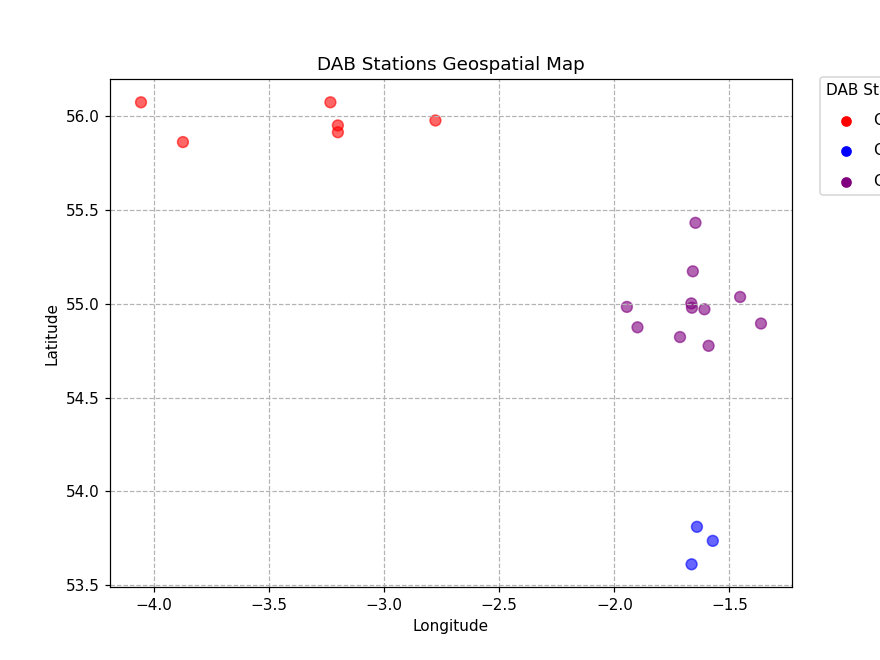

In [38]:
%matplotlib notebook

# Create a dictionary to map DAB stations to colors
dab_station_colors = {
    'C18A': 'red',
    'C18F': 'blue',
    'C188': 'purple'
}

# Map DAB stations to colors
c18af8_viz['Color'] = c18af8_viz['DAB Station'].map(dab_station_colors)

# Create the main scatter plot
fig, ax = plt.subplots(figsize=(8, 6))
scatter = ax.scatter(c18af8_viz['Long'], c18af8_viz['Lat'], c=c18af8_viz['Color'], s=50, alpha=0.6)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('DAB Stations Geospatial Map')

# Add a legend for the color coding
for dab_station, color in dab_station_colors.items():
    ax.scatter([], [], c=color, label=dab_station)

ax.legend(scatterpoints=1, frameon=True, labelspacing=1, title='DAB Station', bbox_to_anchor=(1.03, 1.02), loc='upper left')

ax.grid(True, which="both", ls="--", c='0.7')

# Placeholder for the annotation (initially not visible)
annotation = ax.annotate('', xy=(0,0), xytext=(0,10), textcoords='offset points',
                         bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="aliceblue"),
                         arrowprops=dict(facecolor='black', arrowstyle="->"),
                         visible=False)

# Function to update and display annotation when a point is clicked
def on_click(event):
    cont, ind = scatter.contains(event)
    if cont:
        station = c18af8_viz.iloc[ind["ind"][0]]
        details = f"Site: {station['Site']}\nDAB: {station['DAB Station']}\nFreq: {station['Freq.']}\nBlock: {station['Block']}"
        annotation.set_text(details)
        annotation.set_position((event.xdata, event.ydata))
        annotation.xy = (event.xdata, event.ydata)
        annotation.set_visible(True)
    else:
        annotation.set_visible(False)
    fig.canvas.draw_idle()

# Connect the click event to our function
fig.canvas.mpl_connect('motion_notify_event', on_click)

# Display the plot with interactive points
plt.show()

# you need to add the "%matplotlib notebook" line to the top of your file to make the graph interactable in the notebook,
# otherwise the popups don't display  
# NOT WORKING - FIGURE OUT WHY

### 5. Determine if there is any significant correlation between the ‘Freq’, ‘Block’, ‘Serv Label1’, ‘Serv Label2’, ‘Serv Label3’, ‘Serv label4’,’Serv Label10’ used by the extracted DAB stations.

You will need to select an appropriate visualisation to demonstrate this.

In [39]:
# new column to indicate the DF source
c18a_df['DAB Station'] = 'C18A'
c18f_df['DAB Station'] = 'C18F'
c188_df['DAB Station'] = 'C188'

# list of columns to keep/that are necessary for this task
correlation_columns = ['Freq.', 'Block', 'Serv Label1', 'Serv Label2', 'Serv Label3', 'Serv Label4', 'Serv Label10']

# new DF with selected columns from original DFs
correlation_c18af8 = pd.concat([c18a_df[correlation_columns], c18f_df[correlation_columns], c188_df[correlation_columns]], ignore_index=True)
    
correlation_c18af8.head(20)

,Freq.,Block,Serv Label1,Serv Label2,Serv Label3,Serv Label4,Serv Label10
0,229.072,12D,Forth 1,Forth 2,Heart,Hits Radio Uk,Magic Soul
1,229.072,12D,Forth 1,Forth 2,Heart,Hits Radio Uk,Magic Soul
2,229.072,12D,Forth 1,Forth 2,Heart,Hits Radio Uk,Magic Soul
3,229.072,12D,Forth 1,Forth 2,Heart,Hits Radio Uk,Magic Soul
4,229.072,12D,Forth 1,Forth 2,Heart,Hits Radio Uk,Magic Soul
5,229.072,12D,Forth 1,Forth 2,Heart,Hits Radio Uk,Magic Soul
6,229.072,12D,Grt Hits Leeds,Smooth Uk,Absolute C Rock,Magic Chilled,Absolute Country
7,229.072,12D,Grt Hits Leeds,Smooth Uk,Absolute C Rock,Magic Chilled,Absolute Country
8,229.072,12D,Grt Hits Leeds,Smooth Uk,Absolute C Rock,Magic Chilled,Absolute Country
9,220.352,11C,Metro Radio,Grt Hits N East,Smooth Radio,Hits Radio Uk,Magic Soul


In [40]:
# One-hot encode categorical columns
one_hot_df = pd.get_dummies(correlation_c18af8, columns=['Freq.', 'Block', 'Serv Label1', 'Serv Label2', 'Serv Label3', 'Serv Label4', 'Serv Label10'])

# Calculate the correlation matrix
correlation_matrix = one_hot_df.corr()
correlation_matrix

,Freq._220.352,Freq._229.072,Block_11C,Block_12D,Serv Label1_Forth 1,Serv Label1_Grt Hits Leeds,Serv Label1_Metro Radio,Serv Label2_Forth 2,Serv Label2_Grt Hits N East,Serv Label2_Smooth Uk,Serv Label3_Absolute C Rock,Serv Label3_Heart,Serv Label3_Smooth Radio,Serv Label4_Hits Radio Uk,Serv Label4_Magic Chilled,Serv Label10_Absolute Country,Serv Label10_Magic Soul
Freq._220.352,1.000000,-1.000000,1.000000,-1.000000,-0.723747,-0.46442,1.000000,-0.723747,1.000000,-0.46442,-0.46442,-0.723747,1.000000,0.46442,-0.46442,-0.46442,0.46442
Freq._229.072,-1.000000,1.000000,-1.000000,1.000000,0.723747,0.46442,-1.000000,0.723747,-1.000000,0.46442,0.46442,0.723747,-1.000000,-0.46442,0.46442,0.46442,-0.46442
Block_11C,1.000000,-1.000000,1.000000,-1.000000,-0.723747,-0.46442,1.000000,-0.723747,1.000000,-0.46442,-0.46442,-0.723747,1.000000,0.46442,-0.46442,-0.46442,0.46442
Block_12D,-1.000000,1.000000,-1.000000,1.000000,0.723747,0.46442,-1.000000,0.723747,-1.000000,0.46442,0.46442,0.723747,-1.000000,-0.46442,0.46442,0.46442,-0.46442
Serv Label1_Forth 1,-0.723747,0.723747,-0.723747,0.723747,1.000000,-0.27501,-0.723747,1.000000,-0.723747,-0.27501,-0.27501,1.000000,-0.723747,0.27501,-0.27501,-0.27501,0.27501
Serv Label1_Grt Hits Leeds,-0.464420,0.464420,-0.464420,0.464420,-0.275010,1.00000,-0.464420,-0.275010,-0.464420,1.00000,1.00000,-0.275010,-0.464420,-1.00000,1.00000,1.00000,-1.00000
Serv Label1_Metro Radio,1.000000,-1.000000,1.000000,-1.000000,-0.723747,-0.46442,1.000000,-0.723747,1.000000,-0.46442,-0.46442,-0.723747,1.000000,0.46442,-0.46442,-0.46442,0.46442
Serv Label2_Forth 2,-0.723747,0.723747,-0.723747,0.723747,1.000000,-0.27501,-0.723747,1.000000,-0.723747,-0.27501,-0.27501,1.000000,-0.723747,0.27501,-0.27501,-0.27501,0.27501
Serv Label2_Grt Hits N East,1.000000,-1.000000,1.000000,-1.000000,-0.723747,-0.46442,1.000000,-0.723747,1.000000,-0.46442,-0.46442,-0.723747,1.000000,0.46442,-0.46442,-0.46442,0.46442
Serv Label2_Smooth Uk,-0.464420,0.464420,-0.464420,0.464420,-0.275010,1.00000,-0.464420,-0.275010,-0.464420,1.00000,1.00000,-0.275010,-0.464420,-1.00000,1.00000,1.00000,-1.00000


<IPython.core.display.Javascript object>


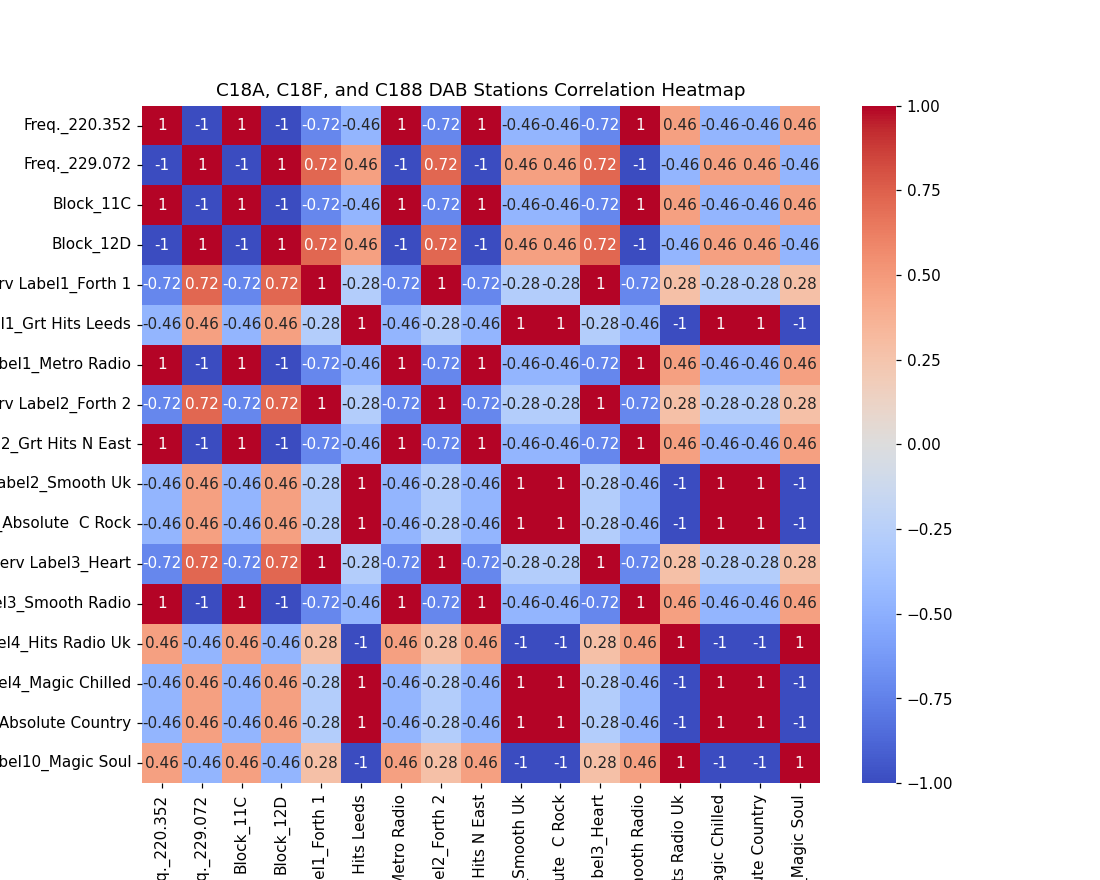

In [41]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, square=True, )
plt.title("C18A, C18F, and C188 DAB Stations Correlation Heatmap")
plt.show()